In [1]:
import ast

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from graph_reinforcement_learning_using_blockchain_data import config
from graph_reinforcement_learning_using_blockchain_data.modeling import train

config.load_dotenv()

2025-03-10 10:44:50.258 | INFO     | graph_reinforcement_learning_using_blockchain_data.config:<module>:11 - PROJ_ROOT path is: /Users/liamtessendorf/Programming/Uni/2_Master/4_FS25_Programming/graph-reinforcement-learning-using-blockchain-data


True

In [2]:
df_features = pd.read_csv(
    config.PROCESSED_DATA_DIR / "flashbots" / "Q2_2023" / "features_edges.csv"
)
df_embeddings = pd.read_csv(config.FLASHBOTS_Q2_DATA_DIR / "embeddings.csv")

In [3]:
df_embeddings.head()

,transactionHash,embeddings
0,0x8e90ecb85b61af368db0154830453552f0c27e0e1812...,[0. 0. 0. 0. 0...
1,0xd83c25449d0766a18945f10aff7912f2ff492f0234a8...,[0. 0. 0. 0. 0...
2,0x8d3b8e46a66a909643f2bb7497b18c954fc22fa5bd5c...,[0. 0. 0. 0. 0...
3,0x25908bad48b2353a1da142da6f0a19c015dfbac5245f...,[0. 0. 0. 0. 0...
4,0x78d66376b7f4cd481a31ccd9b4c1440259695cb2e5d2...,[0.0000000e+00 0.0000000e+00 0.0000000e+00 5.3...


In [4]:
def parse_embedding(embedding_str):
    embedding_str = embedding_str.replace("\n", " ")
    embedding_array = np.fromstring(embedding_str.strip("[]"), sep=" ")
    return embedding_array


df_embeddings['embeddings'] = df_embeddings['embeddings'].apply(parse_embedding)
# df_embeddings['embeddings'] = np.vstack(df_embeddings['embeddings'].values)

In [5]:
df_embeddings["embeddings"][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02674205, 0.        , 0.        , 0.23398295, 0.        ,
       0.        , 0.27547368, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.28303567,
       0.        , 0.        , 0.        , 0.        , 0.16507265,
       0.        , 0.20980863, 0.73747706, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1145173 ,
       0.        , 0.10171653, 0.        , 0.        , 0.        ,
       0.02327326, 0.        , 0.81529987, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.4704783 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06202091, 0.        , 0.        ,
       0.33414537, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.8117291 , 0.     

In [6]:
df_merged = df_features.merge(df_embeddings, how="inner", on="transactionHash")

In [7]:
embedding_matrix = np.vstack(df_merged['embeddings'].values)

In [8]:
df_merged.head()

,transactionHash,blockNumber,gasUsed,cumulativeGasUsed,transactionIndex,effectiveGasPrice,status,fee,from,to,...,dummy_0x19b47279,dummy_0x8201aa3f,dummy_0xc42079f9,dummy_0xddf252ad,dummy_0x17307eab,dummy_0xddac4093,dummy_0x8c5be1e5,dummy_0x7fcf532c,label,embeddings
0,0x8e90ecb85b61af368db0154830453552f0c27e0e1812...,17005294,153529,10750253,111,19150328915,1,2940130847991035,0x832aC338d06f5A438f3340B724c08C44e744e9c2,0x00000000000001ad428e4906aE43D8F9852d0dD6,...,0,0,0,1,0,0,1,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0xd83c25449d0766a18945f10aff7912f2ff492f0234a8...,16962424,123497,229900,1,139502435999,1,17228132338568503,0x080086911D8c78008800FAE75871a657b77d0082,0x0000E0Ca771e21bD00057F54A68C30D400000000,...,0,0,0,1,0,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0x8d3b8e46a66a909643f2bb7497b18c954fc22fa5bd5c...,16972733,46817,14885776,165,18825121161,1,881335697394537,0xCA8ba7d3f798d1872A8C05c5358a1b24a4d3Ac64,0x2b591e99afE9f32eAA6214f7B7629768c40Eeb39,...,0,0,0,1,0,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0x25908bad48b2353a1da142da6f0a19c015dfbac5245f...,17028487,32215,3160909,48,19660583885,1,633365709855275,0x8FEf490D614fCe8B93Bd6F28835dD35a8B3229a9,0xBA50933C268F567BDC86E1aC131BE072C6B0b71a,...,0,0,0,1,0,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0x78d66376b7f4cd481a31ccd9b4c1440259695cb2e5d2...,17067044,153886,9279317,110,45282851253,1,6968396847919158,0xc94893b6D1CC1d7ce09Fec6abC9B5949A903d2C9,0xEf1c6E67703c7BD7107eed8303Fbe6EC2554BF6B,...,0,0,1,1,0,0,0,0,0,"[0.0, 0.0, 0.0, 0.53064322, 0.0, 0.0, 0.0, 0.0..."


In [9]:
df = df_merged.drop(columns=["transactionHash", "from", "to", "blockNumber", "transactionIndex", "embeddings"])
df.head()

,gasUsed,cumulativeGasUsed,effectiveGasPrice,status,fee,num_logs,dummy_0xd78ad95f,dummy_0xe1fffcc4,dummy_0x908fb5ee,dummy_0xe9149e1b,...,dummy_0x9d9af8e3,dummy_0x19b47279,dummy_0x8201aa3f,dummy_0xc42079f9,dummy_0xddf252ad,dummy_0x17307eab,dummy_0xddac4093,dummy_0x8c5be1e5,dummy_0x7fcf532c,label
0,153529,10750253,19150328915,1,2940130847991035,3,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,123497,229900,139502435999,1,17228132338568503,7,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,46817,14885776,18825121161,1,881335697394537,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,32215,3160909,19660583885,1,633365709855275,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,153886,9279317,45282851253,1,6968396847919158,5,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [10]:
other_features = df.drop(columns=["label"]).to_numpy()
X = np.hstack([other_features, embedding_matrix])
y = df["label"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
features_to_scale = []

In [13]:
rf_trainer = train.RandomForestTrainer()
grid_search = rf_trainer.grid_search(features_to_scale)

In [14]:
best_model = rf_trainer.train(
    X_train, X_test, y_train, y_test, grid_search, "Edge Classification with GNN embeddings"
)

2025/03/10 10:45:04 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END classifier__max_depth=20, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time= 8.8min
[CV] END classifier__max_depth=20, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time= 6.4min
[CV] END classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=  54.7s
[CV] END classifier__max_depth=20, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=12.9min
[CV] END classifier__max_depth=30, classifier__max_features=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=10.3min
[CV] END classifier__max_depth=20, clas

2025/03/10 11:32:02 INFO mlflow.sklearn.utils: Logging the 5 best runs, 15 runs will be omitted.


🏃 View run stylish-gull-252 at: http://127.0.0.1:8080/#/experiments/960998358711185575/runs/d73fa5019c4b4851a1d56516b9ac1208
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/960998358711185575
🏃 View run languid-ram-275 at: http://127.0.0.1:8080/#/experiments/960998358711185575/runs/307c332791cf46ea9d266ea9c1191783
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/960998358711185575
🏃 View run stylish-chimp-945 at: http://127.0.0.1:8080/#/experiments/960998358711185575/runs/7e3a397ddd7740c996aded8eecce7e3e
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/960998358711185575
🏃 View run rare-bat-911 at: http://127.0.0.1:8080/#/experiments/960998358711185575/runs/2883776b308e4017aace4aa9f382b061
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/960998358711185575
🏃 View run masked-conch-848 at: http://127.0.0.1:8080/#/experiments/960998358711185575/runs/68d16f942f814ce9a82b52793635120e
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/9609983587111

In [15]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best RMSE score: {-grid_search.best_score_:.3f}")

Best parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_features': None, 'classifier__max_depth': 30}
Best RMSE score: -0.989


In [16]:
rf = best_model

In [17]:
print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))

Train Accuracy: 0.9926581975708932
Test Accuracy: 0.9898479855426809


In [18]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     14926
           1       0.98      1.00      0.99     22702

    accuracy                           0.99     37628
   macro avg       0.99      0.99      0.99     37628
weighted avg       0.99      0.99      0.99     37628



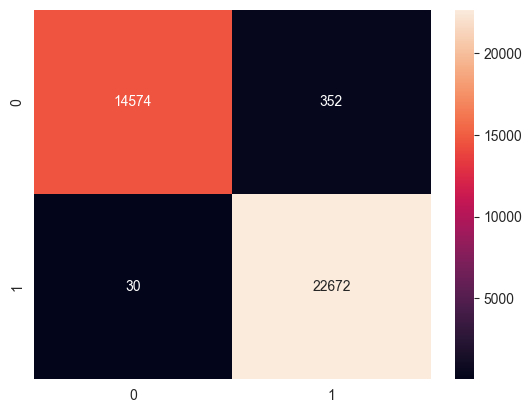

In [19]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [20]:
perm_importance = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()

KeyboardInterrupt: 